# Data Product: A Road Trip Planner with chat feature

# Ngrok Web Desgin Rendering



In [ ]:
!pip install -U PyMySQL sqlalchemy flask pyngrok geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 904.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
ERROR: Cannot uninstall 'blinker'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
!sudo pip3 install -U -q PyMySQL sqlalchemy sql_magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For flask server
import os
import threading
from flask import Flask
from pyngrok import ngrok
from flask import render_template, jsonify
import base64
from io import BytesIO
from flask import request

In [ ]:
# Setup Flask and ngrok
os.environ["FLASK_DEBUG"] = "true"
app = Flask(__name__, template_folder = '/content/drive/My Drive/website_ds',
            static_folder='/content/drive/My Drive/website_ds/static')
port = 5000

# Open a ngrok tunnel to the HTTP server
ngrok_authtoken = '2X01So3CN0NODSiOIGQLSIiD2FK_5iALCgqVARP9mZG8w7Rgd'
ngrok.set_auth_token(ngrok_authtoken)
public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel '{public_url}' -> 'http://127.0.0.1:{port}'")

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url

### Main page
  - Collision, Construction, Traffic Visualization on the New York Map
  - Route finding map with a feature the users to enter thier location coordinates for travel
  - Chat feature
  - Combined stats (if possible)

In [ ]:
!sudo pip3 install  -U -q geopandas PyMySQL sqlalchemy sql_magic osmnx
!curl 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON' -o nyc-neighborhoods.geojson

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4370k    0 4370k    0     0  2543k      0 --:--:--  0:00:01 --:--:-- 2542k


In [ ]:
pip install osmnx

In [ ]:
import osmnx as ox
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import geopandas as gpd
import matplotlib as plt
from sqlalchemy import text
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.cm import get_cmap
from sqlalchemy import create_engine

ox.__version__
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
conn_string = f"mysql+pymysql://{'student'}:{'dwdstudent2015'}@{'db.ipeirotis.org'}/{'public'}" #{user}:{password}@{host}/{db_name}
engine = create_engine(conn_string)

In [ ]:
q1 = "SELECT * FROM public.TeamA_Data_traffic;"
q2 = "SELECT * FROM public.TeamA_Data_construction;"
q3 = "SELECT * FROM public.TeamA_Data_collisions"

with engine.connect() as connection:
  collision_data = pd.read_sql_query(text(q3), connection)

with engine.connect() as connection:
  construction_data = pd.read_sql_query(text(q2), connection)

with engine.connect() as connection:
  traffic_data = pd.read_sql_query(text(q1), connection)

# include in website

# deleting rows with '0' as location values (like borough)
collision_data = collision_data[collision_data['borough'] != '0']
construction_data = construction_data[construction_data['borough'] != '0']


# changing construction years to 2023 (it's active data)
construction_data['data_as_of'] = pd.to_datetime(construction_data['data_as_of'])
construction_data['data_as_of'] = construction_data['data_as_of'].apply(lambda d: d.replace(year=2023))

<ipython-input-38-676582ef698c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  construction_data['data_as_of'] = pd.to_datetime(construction_data['data_as_of'])


In [ ]:
#add borough column to traffic data

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

borough_boundaries_path = '/content/drive/My Drive/groupA_templates/new-york-city-boroughs.geojson'
borough_boundaries = gpd.read_file(borough_boundaries_path)

# creating a GeoDataFrame from traffic_data
traffic_geo = gpd.GeoDataFrame(traffic_data, geometry=gpd.points_from_xy(traffic_data['longitude'], traffic_data['latitude']))

# Spatial join to get the borough for each point
traffic_geo_with_borough = gpd.sjoin(traffic_geo, borough_boundaries, op='within')

# Add the 'borough' column to the original traffic_data DataFrame
traffic_data['borough'] = traffic_geo_with_borough['name']

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-39-7aa131617143>:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  traffic_geo_with_borough = gpd.sjoin(traffic_geo, borough_boundaries, op='within')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Correcting the borough name in construction_data
construction_data['borough'] = construction_data['borough'].replace({'STATEN IS': 'STATEN ISLAND'})

# Capitalize all borough names in traffic_data
traffic_data['borough'] = traffic_data['borough'].str.upper()

# Dropdown widgets for borough selection
dropdown1 = widgets.Dropdown(
    options=collision_data['borough'].unique(),
    description='Borough 1:',
)

dropdown2 = widgets.Dropdown(
    options=collision_data['borough'].unique(),
    description='Borough 2:',
)

# Button to trigger the display of the graphs
button = widgets.Button(description="Show Graphs")

# Function to display graphs using matplotlib
def display_matplotlib_graphs(borough1, borough2):
    # Clear the previous output
    clear_output(wait=True)
    display(dropdown1, dropdown2, button)

    # Filter data for selected boroughs
    filtered_collision_data = collision_data[collision_data['borough'].isin([borough1, borough2])]
    filtered_construction_data = construction_data[construction_data['borough'].isin([borough1, borough2])]
    filtered_traffic_data = traffic_data[traffic_data['borough'].isin([borough1, borough2])]

    # Calculate counts for each borough
    collision_counts = filtered_collision_data['borough'].value_counts().reindex([borough1, borough2]).fillna(0)
    construction_counts = filtered_construction_data['borough'].value_counts().reindex([borough1, borough2]).fillna(0)
    traffic_counts = filtered_traffic_data['borough'].value_counts().reindex([borough1, borough2]).fillna(0)

    # Setting up the bar plots
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Creating the bars for collision counts
    axes[0].bar(collision_counts.index, collision_counts, color=['blue', 'orange'])
    axes[0].set_title('Collision Counts')
    axes[0].set_ylabel('Counts')
    axes[0].set_xlabel('Borough')

    # Creating the bars for construction counts
    axes[1].bar(construction_counts.index, construction_counts, color=['blue', 'orange'])
    axes[1].set_title('Construction Counts')
    axes[1].set_ylabel('Counts')
    axes[1].set_xlabel('Borough')

    # Creating the bars for traffic counts
    axes[2].bar(traffic_counts.index, traffic_counts, color=['blue', 'orange'])
    axes[2].set_title('Traffic Counts')
    axes[2].set_ylabel('Counts')
    axes[2].set_xlabel('Borough')

    # Show the plots
    plt.tight_layout()
    plt.show()

# Function to handle button click
def on_button_clicked(b):
    display_matplotlib_graphs(dropdown1.value, dropdown2.value)

# Link the button click to the function
button.on_click(on_button_clicked)

# Display the initial set of widgets and the button
display(dropdown1, dropdown2, button)


In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Filter data for Brooklyn and Bronx
filtered_collision_data = collision_data[collision_data['borough'].isin(['BROOKLYN', 'BRONX'])]
filtered_construction_data = construction_data[construction_data['borough'].isin(['BROOKLYN', 'BRONX'])]

# Check if filtered data is empty
if filtered_collision_data.empty or filtered_construction_data.empty:
    print("No data found for Brooklyn and Bronx. Please check the borough names in your dataset.")
else:
    # Calculating the number of collisions per borough
    collision_count_per_borough = filtered_collision_data['borough'].value_counts().reset_index()
    collision_count_per_borough.columns = ['borough', 'collision_count']

    # Calculating the number of construction activities per borough
    construction_count_per_borough = filtered_construction_data['borough'].value_counts().reset_index()
    construction_count_per_borough.columns = ['borough', 'construction_count']

    # Merging the data for easier plotting
    merged_data = pd.merge(collision_count_per_borough, construction_count_per_borough, on='borough', how='outer')

    # Create a figure with Plotly
    fig = go.Figure(data=[
        go.Bar(name='Collision Count', x=merged_data['borough'], y=merged_data['collision_count']),
        go.Bar(name='Construction Count', x=merged_data['borough'], y=merged_data['construction_count'])
    ])

    # Change the bar mode
    fig.update_layout(barmode='group', title_text="Comparison of Collisions and Construction Activities in Brooklyn and Bronx")

    fig.show()


In [ ]:
# -------------------> Data modelling: aggregating the data for value insights

In [ ]:
time_columns = traffic_data.columns[7:31]
traffic_data["Average_volume"] = traffic_data[time_columns].sum(axis=1)/24
df1 = traffic_data.groupby(['latitude', 'longitude', 'Roadway_Name', 'Direction', 'From_St', 'To_St']).agg({
    'Average_volume': 'mean'
}).reset_index()
df1.shape

(4560, 7)

In [ ]:
df2 = construction_data.groupby(["borough", 'latitude', 'longitude', 'consttype', 'buildingid', 'zip_code']).agg({
    'unique_id': 'count',
    'award': 'mean'
}).reset_index()
df2.shape

(6166, 8)

In [ ]:
collision_data['crash_date'] = pd.to_datetime(collision_data['crash_date'])
filtered_crash_data_2023 = collision_data[collision_data['crash_date'].dt.year == 2021]
filtered_crash_data_2023.shape

(72202, 21)

In [ ]:
collision_data.head(2)

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
0,2016-06-02,0 days 07:28:00,BROOKLYN,11210,40.633427,-73.952980,BEDFORD AVENUE,GLENWOOD ROAD,1,0,...,0,0,0,1,0,Unspecified,Unspecified,3456194,4 dr sedan,Station Wagon/Sport Utility Vehicle
1,2016-06-06,0 days 14:56:00,BROOKLYN,11212,40.658183,-73.924644,EAST 91 STREET,CLARKSON AVENUE,0,0,...,0,0,0,0,0,Unspecified,Unspecified,3460534,4 dr sedan,0


In [ ]:
filtered_crash_data_2023 = filtered_crash_data_2023.dropna()
aggregated_df = filtered_crash_data_2023.groupby(['borough','latitude', 'longitude']).agg({
    'number_of_persons_injured': 'mean',
    'number_of_persons_killed': 'mean',
    'number_of_cyclist_injured': 'mean',
    'number_of_cyclist_killed': 'mean',
    'number_of_motorist_injured': 'mean',
    'number_of_motorist_killed': 'mean'
}).reset_index()
aggregated_df['total_casualties'] = aggregated_df[['number_of_persons_injured', 'number_of_persons_killed',
                                                   'number_of_cyclist_injured', 'number_of_cyclist_killed',
                                                   'number_of_motorist_injured', 'number_of_motorist_killed']].sum(axis=1)
collision_data = aggregated_df[['borough','latitude','longitude','total_casualties']]

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

def clustering(df, n, str_agg):
  selected_features = df[['latitude', 'longitude']]
  selected_features = selected_features.dropna()

  kmeans = KMeans(n_clusters=n, random_state=42)
  df['cluster'] = kmeans.fit_predict(selected_features)

  # Compute cluster centers
  cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['latitude', 'longitude'])
  df['cluster'] = kmeans.predict(selected_features)

  cluster_statistics = df.groupby('cluster').agg({
      str_agg: 'mean',
      'borough': lambda x: x.mode().iloc[0]
  }).reset_index()

  # Merge cluster_centers with cluster_statistics
  cluster_info = pd.merge(cluster_centers, cluster_statistics, left_index=True, right_on='cluster')
  df = cluster_info[['latitude', 'longitude', str_agg, 'borough']]
  df = df[(df['latitude'] != 0.000000) & (df['longitude'] != 0.000000)].reset_index(drop=True)

  return df

df3 = clustering(df, 1000, "total_casualties")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-24-931757e68c11>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(selected_features)
<ipython-input-24-931757e68c11>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.predict(selected_features)


In [ ]:
#------->graphing

In [ ]:
traffic_gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1['longitude'], df1['latitude']))
construction_gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2['longitude'], df2['latitude']))
collision_gdf = gpd.GeoDataFrame(df3, geometry=gpd.points_from_xy(df3['longitude'], df3['latitude']))

In [ ]:
G = ox.graph_from_place("New York, USA", network_type="drive")

In [ ]:
plt.figure(figsize=(50, 50))

# Visualize the street network
ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.5, bgcolor='k', show=False)

# Plot construction and collision locations with different markers and colors
plt.scatter(traffic_gdf.geometry.x, traffic_gdf.geometry.y, color='red', s=30, marker='o', label='Traffic')
plt.scatter(construction_gdf.geometry.x, construction_gdf.geometry.y, color='cyan', s=30, marker='s', label='Construction')
plt.scatter(collision_gdf.geometry.x, collision_gdf.geometry.y, color='orange', s=30, marker='x', label='Collision')

plt.title('Street Network of New York City with Construction, Collision and Traffic Locations')
plt.legend()
plt.show()

# Save the figure to a BytesIO buffer
# buf = BytesIO()
# plt.savefig(buf, format="png")
# all_fig = base64.b64encode(buf.getvalue()).decode("ascii")

In [ ]:
# include in website

import folium
from folium.plugins import FastMarkerCluster
import random

def plot_collision_on_map(data1, data2, data3, sample_size=None):
    """Visualize collision data on a map using folium."""

    # Filter NaN values before the loop
    data1 = data1.dropna(subset=['longitude', 'latitude'])
    data2 = data2.dropna(subset=['longitude', 'latitude'])
    data3 = data3.dropna(subset=['longitude', 'latitude'])

    m = folium.Map(location=[40.7128, -74.0060], titles='Visualization for Construction, Collisions and Traffic', zoom_start=20)

    # Create FastMarkerClusters for each data category
    collisions_cluster = FastMarkerCluster([], name='Vehicle Collisions').add_to(m)
    construction_cluster = FastMarkerCluster([], name='Construction Projects').add_to(m)
    traffic_cluster = FastMarkerCluster([], name='Traffic Projects').add_to(m)

    # Function to add markers to clusters
    def add_marker_to_cluster(row, cluster, color):
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6
        ).add_to(cluster)

    # Sample data if specified
    if sample_size:
        data1 = data1.sample(n=min(sample_size, len(data1)))
        data2 = data2.sample(n=min(sample_size, len(data2)))
        data3 = data3.sample(n=min(sample_size, len(data3)))

    # Apply the function to add markers to clusters
    data1.apply(lambda row: add_marker_to_cluster(row, collisions_cluster, 'red'), axis=1)
    data2.apply(lambda row: add_marker_to_cluster(row, construction_cluster, 'blue'), axis=1)
    data3.apply(lambda row: add_marker_to_cluster(row, traffic_cluster, 'green'), axis=1)

    # Add marker clusters to the map
    folium.LayerControl().add_to(m)
    return m
map_object = plot_collision_on_map(df3, df2, df1, 1000)
map_object.save('map_with_route.html')
map_object

In [ ]:
import folium
def plot_collision_on_map(data1, data2, data3):
    """Visualize collision data on a map using folium."""

    data1 = data1.dropna(subset=['longitude', 'latitude'])
    data2 = data2.dropna(subset=['longitude', 'latitude'])
    data3 = data3.dropna(subset=['longitude', 'latitude'])
    m = folium.Map(location=[40.7128, -74.0060], titles='Visualization for Construction, Collisions and Traffic', zoom_start=20)

    # Create feature groups for each data category
    collisions_group = folium.FeatureGroup(name='Vehicle Collisions')
    construction_group = folium.FeatureGroup(name='Construction Projects')
    traffic_group = folium.FeatureGroup(name='Traffic Projects')

    for _, row in data1.iterrows():
      folium.CircleMarker(
          location=[row['latitude'], row['longitude']],
          radius=5,
          color='red',
          fill=True,
          fill_color='red',
          fill_opacity=0.6
      ).add_to(collisions_group)

    for _, row in data2.iterrows():
      folium.CircleMarker(
          location=[row['latitude'], row['longitude']],
          radius=5,
          color='blue',
          fill=True,
          fill_color='blue',
          fill_opacity=0.6
      ).add_to(construction_group)

    for _, row in data3.iterrows():
      folium.CircleMarker(
          location=[row['latitude'], row['longitude']],
          radius=5,
          color='green',
          fill=True,
          fill_color='green',
          fill_opacity=0.6
      ).add_to(traffic_group)

    collisions_group.add_to(m)
    construction_group.add_to(m)
    traffic_group.add_to(m)

    folium.LayerControl().add_to(m)
    return m

map_object = plot_collision_on_map(df3, df2, df1)
map_object

In [ ]:
min = df1["Average_volume"].min()
max = df1["Average_volume"].max()
range = max - min
df1["Average_volume"] = ((df1["Average_volume"] - min)/range)*100
borough_boundaries_path = '/content/drive/My Drive/groupA_templates/new-york-city-boroughs.geojson'
borough_boundaries = gpd.read_file(borough_boundaries_path)
traffic_geo = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1['longitude'], df1['latitude']))
traffic_geo_with_borough = gpd.sjoin(traffic_geo, borough_boundaries, op='within')
df1['borough'] = traffic_geo_with_borough['name']
df1 = df1[df1['borough'] == "Manhattan"]
df1 = clustering(df1, 50, "Average_volume")
df1.head(5)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-26-bdcbac7fbc67>:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  traffic_geo_with_borough = gpd.sjoin(traffic_geo, borough_boundaries, op='within')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-24-931757e68c11>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,latitude,longitude,Average_volume,borough
0,40.771149,-73.957749,15.731237,Manhattan
1,40.723243,-73.994129,8.564283,Manhattan
2,40.837923,-73.938841,5.381680,Manhattan
3,40.755528,-73.976743,17.059121,Manhattan
4,40.807723,-73.954700,4.117170,Manhattan


In [ ]:
df2 = df2[df2['borough'] == "MANHATTAN"]
df2 = clustering(df2, 50, "award")
df2.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(50, 4)

In [ ]:
min = df3["total_casualties"].min()
max = df3["total_casualties"].max()
range = max - min
df3["total_casualties"] = ((df3["total_casualties"] - min)/range)*100
df3 = df3[df3['borough'] == "MANHATTAN"]
df3 = clustering(df3, 50, "total_casualties")
df3.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(50, 4)

In [ ]:
#--------------------> Routing
# guys please do not run the hiden code that is for adding weights to the graph
# keeping the code here for professor's reference

In [ ]:
# @title
# Convert latitude and longitude columns to numeric type
df['latitude'] = pd.to_numeric(traffic_data['latitude'])
traffic_data['longitude'] = pd.to_numeric(traffic_data['longitude'])

construction_data['latitude'] = pd.to_numeric(construction_data['latitude'])
construction_data['longitude'] = pd.to_numeric(construction_data['longitude'])

collision_data['latitude'] = pd.to_numeric(collision_data['latitude'])
collision_data['longitude'] = pd.to_numeric(collision_data['longitude'])

<ipython-input-29-5f69f75863df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'] = pd.to_numeric(traffic_data['latitude'])


In [ ]:
# @title
df1 = df1.dropna(subset=['longitude', 'latitude']) #traffic
df2 = df2.dropna(subset=['longitude', 'latitude']) #construction
df3 = df3.dropna(subset=['longitude', 'latitude']) #collision

In [ ]:
df1.head(2)

,latitude,longitude,Average_volume,borough
0,40.771149,-73.957749,15.731237,Manhattan
1,40.723243,-73.994129,8.564283,Manhattan


In [ ]:
#--------------
df1.to_csv("/content/drive/MyDrive/website_ds/traffic_clustered.csv")
df2.to_csv("/content/drive/MyDrive/website_ds/construction_clustered.csv")
df3.to_csv("/content/drive/MyDrive/website_ds/collision_clustered.csv")

In [ ]:
# @title
for i, row in df1.iterrows():
    vertices = ox.distance.nearest_edges(G, row['longitude'], row['latitude'])
    u = vertices[0]
    v = vertices[1]
    edge = G[u][v][0]
    edge['weight'] = row['Average_volume']
    print(f"done------>{i}")

In [ ]:
# @title
for i, row in df2.iterrows():
    vertices = ox.distance.nearest_edges(G, row['longitude'], row['latitude'])
    u = vertices[0]
    v = vertices[1]
    edge = G[u][v][0]
    edge['weight'] = 1
    print(f"done------>{i}")

In [ ]:
# @title
for i, row in df3.iterrows():
    vertices = ox.distance.nearest_edges(G, row['longitude'], row['latitude'])
    u = vertices[0]
    v = vertices[1]
    edge = G[u][v][0]
    edge['weight'] = row['total_casualties']
    print(f"done------>{i}")

In [ ]:
# @title
ox.save_graphml(G, filepath="/content/drive/My Drive/website_ds/weighted_graph.graphml")

In [ ]:
#loading this pretrained weigthed graph for path finding

In [ ]:
G_loaded = ox.load_graphml(filepath="/content/drive/My Drive/website_ds/weighted_graph.graphml")

In [ ]:
for u, v, data in G_loaded.edges(data=True):
    if 'weight' in data:
        data['weight'] = float(data['weight'])

In [ ]:
#to convert address to latitude and longitude
from geopy.geocoders import Nominatim

def get_coordinates(address):
    # Initialize Nominatim API with a unique user agent
    geolocator = Nominatim(user_agent="YourAppName")

    # Getting Latitude and Longitude
    location = geolocator.geocode(address)

    if location:
        return location.latitude, location.longitude
    else:
        return None, None

In [ ]:
# optimal routing

import folium

G_loaded = ox.load_graphml(filepath="/content/drive/My Drive/website_ds/weighted_graph.graphml")

for u, v, data in G_loaded.edges(data=True):
    if 'weight' in data:
        data['weight'] = float(data['weight'])

#to convert address to latitude and longitude
from geopy.geocoders import Nominatim

def get_coordinates(address):
    # Initialize Nominatim API with a unique user agent
    geolocator = Nominatim(user_agent="YourAppName")

    # Getting Latitude and Longitude
    location = geolocator.geocode(address)

    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Get starting and ending locations from user input
start_location = input("Enter the starting location: ")
end_location = input("Enter the ending location: ")

# Get coordinates for the starting location
start_lat, start_lng = get_coordinates(start_location)

# Get coordinates for the ending location
end_lat, end_lng = get_coordinates(end_location)

# Display the results
if start_lat is not None and start_lng is not None:
    print(f"Starting Location - Latitude: {start_lat}, Longitude: {start_lng}")
else:
    print("Starting location not found.")

if end_lat is not None and end_lng is not None:
    print(f"Ending Location - Latitude: {end_lat}, Longitude: {end_lng}")
else:
    print("Ending location not found.")

# Use Dijkstra's algorithm to find the optimal route
source_node = ox.distance.nearest_nodes(G_loaded , start_lng, start_lat)
target_node = ox.distance.nearest_nodes(G_loaded , end_lng, end_lat)
optimal_route = nx.shortest_path(G_loaded, source=source_node, target=target_node, weight='weight')

map_center = [start_lat, start_lng]
mymap = folium.Map(location=map_center, zoom_start=12)

for edge in G_loaded.edges:
    start_node, end_node, _ = edge
    start_coord = (G_loaded.nodes[start_node]['y'], G_loaded.nodes[start_node]['x'])
    end_coord = (G_loaded.nodes[end_node]['y'], G_loaded.nodes[end_node]['x'])
    folium.PolyLine([start_coord, end_coord], color='gray', weight=1).add_to(mymap)

# Highlight optimal route on the map
optimal_route_coords = [(G_loaded.nodes[node]['y'], G_loaded.nodes[node]['x']) for node in optimal_route]
folium.PolyLine(optimal_route_coords, color='red', weight=3).add_to(mymap)

# Add markers for traffic cluster locations
for index, row in df1.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f'Traffic Volume {row["Average_volume"]}', icon=folium.Icon(color='blue')).add_to(mymap)

# Add markers for construction cluster locations
for index, row in df2.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f'Construction Award {row["award"]}', icon=folium.Icon(color='green')).add_to(mymap)

# Add markers for collision cluster locations
for index, row in df3.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f'Total Collision Casuality{row["total_casualties"]}', icon=folium.Icon(color='red')).add_to(mymap)

mymap.save('/content/drive/My Drive/website_ds/map_route.html')


In [ ]:
@app.route('/', methods=['GET'])
def index():
  return render_template('index.html', map_html=mymap)

print(f" * ngrok tunnel '{public_url}' -> 'http://127.0.0.1:{port}'")
app.run(use_reloader=False, port=port)

### Contruction Data Analysis

In [ ]:
construction_data.head(2)

,unique_id,name,boro,geo_dist,projdesc,award,consttype,buildingid,building_address,city,...,bin,bbl,census_tract,nta,data_as_of,computed_region_efsh_h5xi,computed_region_f5dn_yrer,computed_region_yeji_bk3q,computed_region_92fq_4b7q,computed_region_sbqj_enih
0,1,K721 SPED - BROOKLYN,K,21,FIRE ALARM SYSTEM REPLACEMENT,999.999999,CIP,K722,64 AVENUE X,Brooklyn,...,3385667,2147483647,308,BK1301,2023-05-23,18183,21,2,45,35
1,2,P.S. 117 - QUEENS,Q,28,LSP DOMESTIC WATER HEATER,999.999999,CIP,Q117,85-15 143RD STREET,Queens,...,4208040,2147483647,232,QN0805,2023-05-23,24670,25,3,24,65


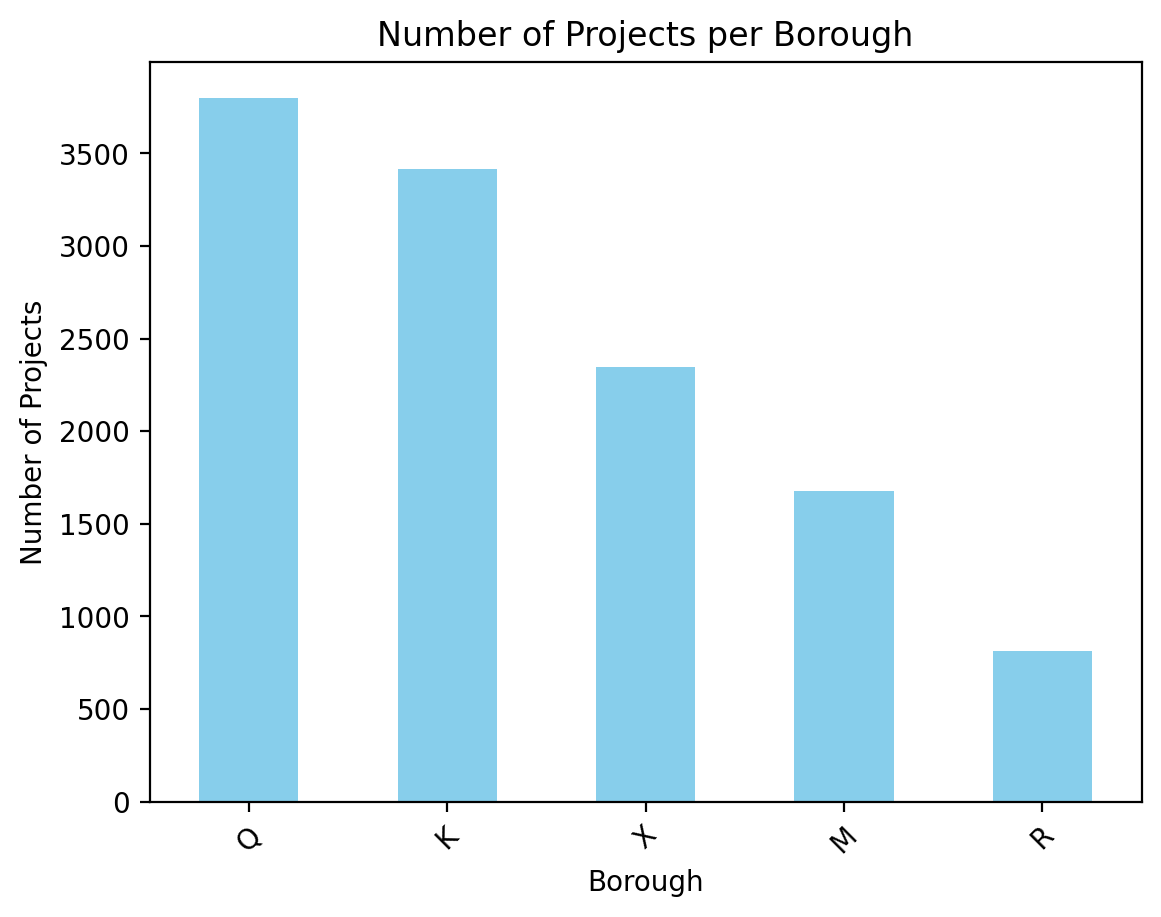

NameError: ignored

In [ ]:
# Plot a bar chart of the number of projects per borough using Matplotlib
borough_counts = construction_data['boro'].value_counts()
borough_counts.plot(kind='bar', rot=45, color='skyblue')
plt.title('Number of Projects per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Projects')
plt.show()

buf = BytesIO()
fig.savefig(buf, format="png")
proj_per_boro = base64.b64encode(buf.getbuffer()).decode("ascii")

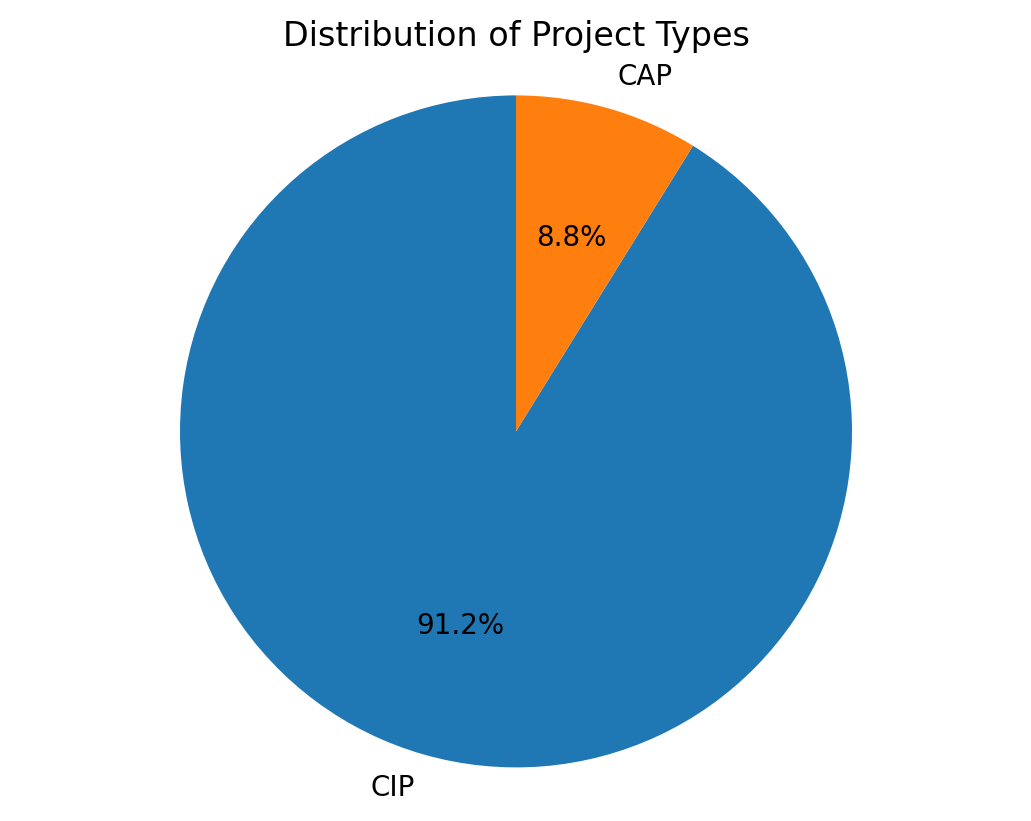

NameError: ignored

In [ ]:
# Distribution of project types
project_type_counts = construction_data['consttype'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(project_type_counts, labels=project_type_counts.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Project Types')
plt.show()

buf = BytesIO()
fig.savefig(buf, format="png")
proj_dist = base64.b64encode(buf.getbuffer()).decode("ascii")

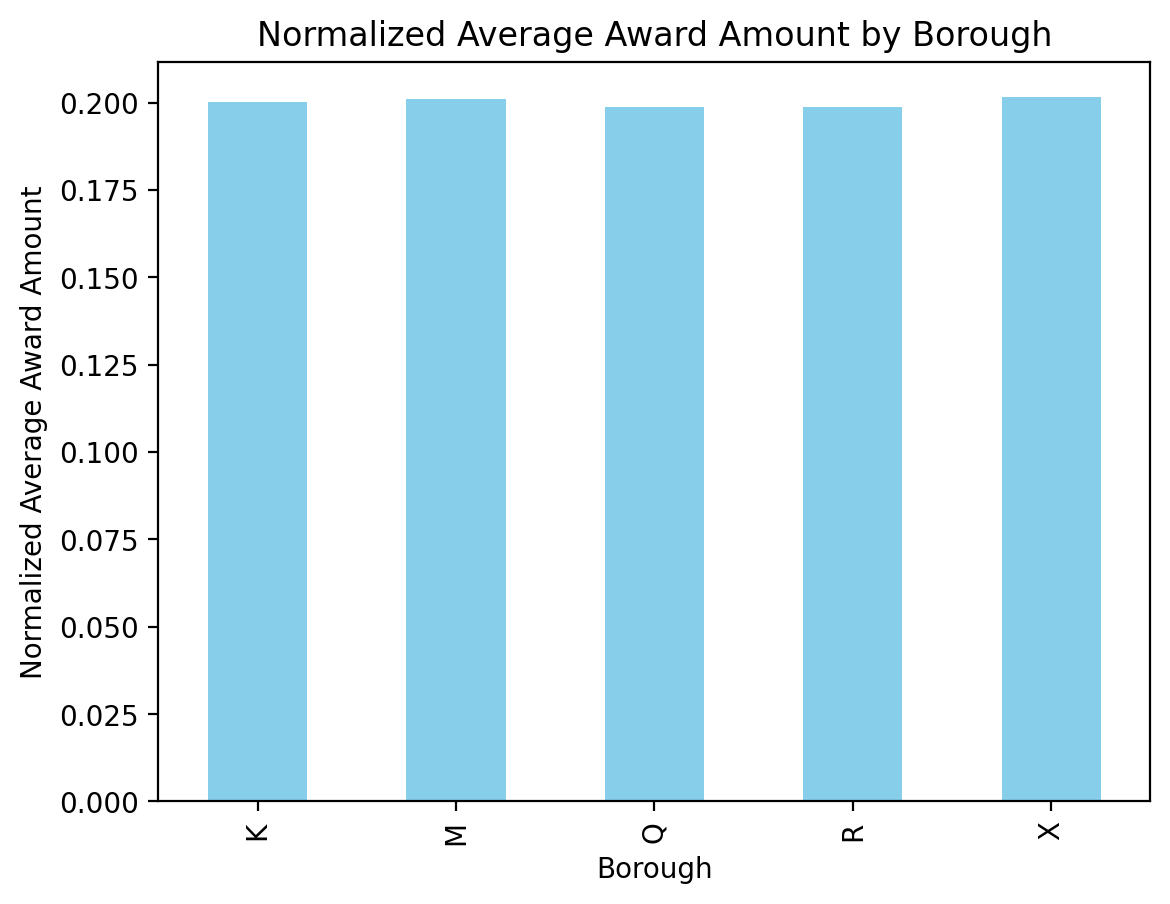

NameError: ignored

In [ ]:
# Average award amount by borough
avg_award_by_borough = construction_data.groupby('boro')['award'].mean()
normalized_avg_award = avg_award_by_borough / avg_award_by_borough.sum()

# Plot the normalized average award amount by borough
fig2, ax2 = plt.subplots()
normalized_avg_award.plot(kind='bar', color='skyblue')
plt.title('Normalized Average Award Amount by Borough')
plt.xlabel('Borough')
plt.ylabel('Normalized Average Award Amount')
plt.show()

buf = BytesIO()
fig.savefig(buf, format="png")
award_boro = base64.b64encode(buf.getbuffer()).decode("ascii")

In [ ]:
import pandas as pd
import plotly.express as px

# Award is the value of prime construction contract
fig = px.density_mapbox(construction_data, lat='latitude', lon='longitude', z='award',
                        radius=10,  # Adjust the radius based on your preference
                        center=dict(lat=construction_data['latitude'].mean(),
                                    lon=construction_data['longitude'].mean()),
                        zoom=10,
                        hover_data=['name', 'projdesc', 'award'],
                        labels={'award': 'Award Amount'},
                        title='Construction Project Concentration Heatmap',
                        mapbox_style='open-street-map')

fig.write_html("construction_heatmap.html")

In [ ]:
@app.route('/construction', methods=['GET'])
def construction():
    return render_template('construction.html', construction_data=construction_data_json,
                           proj_per_boro=proj_per_boro, proj_dist=proj_dist, award_boro=award_boro)

### Collisions Data Analysis

In [ ]:
collision_data.head(2)

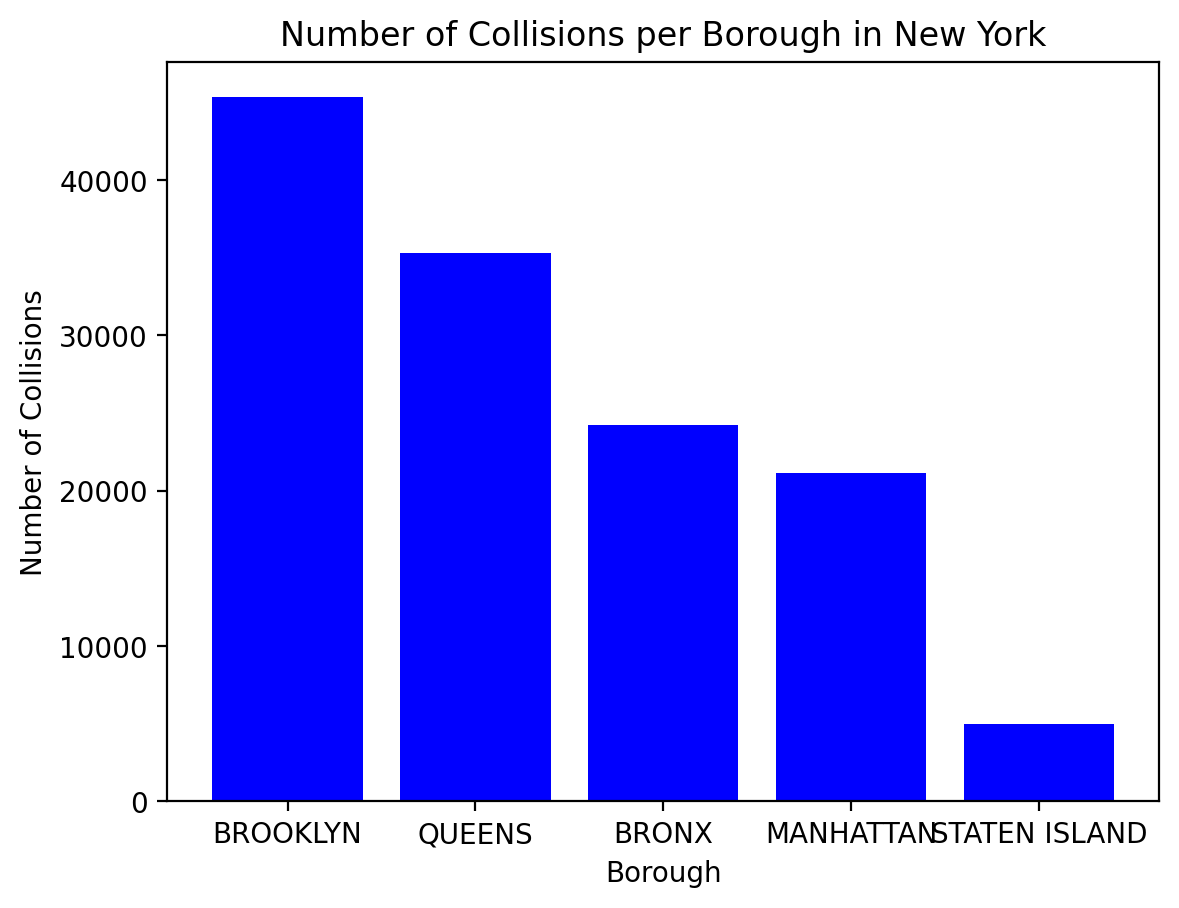

In [ ]:
collision_data['borough'].fillna('Unknown', inplace=True)

# Group by borough and count the number of collisions in each borough
borough_collisions = collision_data['borough'].value_counts()

# Create a bar chart
plt.bar(borough_collisions.index, borough_collisions.values, color='blue')
plt.title('Number of Collisions per Borough in New York')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.show()

A simple program that allows a user to input a street name, and the program will then determine whether or not that street is included in the crash data.

In [ ]:
# user enters street name and it is returned if it is included in the crash data
def is_street_in_crash_data(street_name, df):
    # Check if the street name is present in either 'on_street_name' or 'off_street_name'
    on_street_mask = df['on_street_name'].str.contains(street_name, case=False, na=False)
    off_street_mask = df['off_street_name'].str.contains(street_name, case=False, na=False)

    # Return True if the street is found in either on_street_name or off_street_name
    return any(on_street_mask | off_street_mask)

# Example usage:
user_input_street = input("Enter a street name: ")
result = is_street_in_crash_data(user_input_street, collision_data)

if result:
    print(f"{user_input_street} is included in the crash data.")
else:
    print(f"{user_input_street} is not found in the crash data.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by borough and sum the number of casualties in each borough
borough_casualties = collision_data.groupby('borough')['casualities'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(borough_casualties, labels=borough_casualties.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow', 'lightpink'])
plt.title('Distribution of Casualties by Borough')
plt.show()


KeyError: ignored

In [ ]:
collision_data.head(2)

,borough,latitude,longitude,total_casualties
0,BRONX,0.000000,0.00000,0.813804
1,BRONX,40.799168,-73.91029,0.000000


In [ ]:
import pandas as pd
import plotly.express as px

fig = px.density_mapbox(collision_data, lat='latitude', lon='longitude', z='total_casualties',
                        radius=10,  # Adjust the radius based on your preference
                        center=dict(lat=collision_data['latitude'].mean(),
                                    lon=collision_data['longitude'].mean()),
                        zoom=10,
                        labels={'total_casualities': 'Number of Casualties'},
                        title='Collision Casualties Heatmap',
                        mapbox_style='open-street-map')

fig.write_html("collisions_heatmap.html")


In [ ]:
@app.route('/crash', methods=['GET'])
def crash():
   return render_template('crash.html')

### Traffic Data Analysis

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming you have a valid traffic_data DataFrame
# Replace 'your_latitude_column' and 'your_longitude_column' with the actual column names in your DataFrame

# Set center coordinates to approximate New York City
center_coordinates = {'lat': 40.7128, 'lon': -74.0060}

# Create a density heatmap for collision data
fig = px.density_mapbox(traffic_data, lat='latitude', lon='longitude', z='Average_volume',
                        radius=7,  # Adjust the radius based on your preference
                        center=center_coordinates,
                        zoom=10,
                        hover_data=['Roadway_Name', 'Average_volume'],
                        labels={'Average_volume': 'Traffic Volume'},
                        title='Traffic Volume Heatmap',
                        mapbox_style='open-street-map')

fig.show()


NameError: ignored

In [ ]:
# include in website


# Convert date string to datetime object
traffic_data['datetime'] = pd.to_datetime(traffic_data['Date'], format='%Y-%m-%d')

# Extract day of the week and set the order starting from Sunday
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
traffic_data['day_of_week'] = traffic_data['datetime'].dt.day_name()
traffic_data['day_of_week'] = pd.Categorical(traffic_data['day_of_week'], categories=days_order, ordered=True)

# Create a pivot table without hour information
pivot_table = traffic_data.pivot_table(values='Average_volume', index='day_of_week', aggfunc='mean')

# Create a horizontal bar plot
plt.figure(figsize=(15, 7))
sns.heatmap(pivot_table.T, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Traffic Volume'})
plt.title('Heatmap of Average Traffic Volume by Day')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Hour of the Day')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a valid traffic_data DataFrame
# Replace 'From_St', 'To_St', 'Direction', 'Date', and other column names as needed

# Example: Group by 'boro' and sum the 'Average_volume' for each borough
borough_volume = traffic_data.groupby('borough')['Average_volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='borough', y='Average_volume', data=borough_volume)
plt.title('Traffic Volume by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Volume')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'datetime' is the column containing the datetime information
# Replace 'datetime' and 'Average_volume' with the actual column names in your DataFrame

# Convert 'datetime' to datetime object if not already in datetime format
traffic_data['datetime'] = pd.to_datetime(traffic_data['Date'])

# Group by 'datetime' and sum the 'Average_volume' for each time point
traffic_volume_trends = traffic_data.groupby('Date')['Average_volume'].sum().reset_index()

# Plot traffic volume trends over time using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Average_volume', data=traffic_volume_trends)
plt.title('Traffic Volume Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')

# Set x-axis ticks with a total of 10 labels
ticks_frequency = 20
plt.xticks(range(0, len(traffic_volume_trends), ticks_frequency), traffic_volume_trends['Date'][::ticks_frequency], rotation=45, ha='right')

plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a valid traffic_data DataFrame
# Replace 'From_St', 'To_St', 'Direction', 'Date', and other column names as needed

# Example: Group by 'Roadway_Name' and sum the 'Average_volume' for each street
top_streets = traffic_data.groupby('Roadway_Name')['Average_volume'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Average_volume', y='Roadway_Name', data=top_streets, orient='h')  # orient='h' for horizontal bar plot
plt.title('Top 10 Streets by Traffic Volume')
plt.xlabel('Volume')
plt.ylabel('Roadway Name')
plt.show()


In [ ]:
@app.route('/traffic', methods=['GET'])
def traffic():
   return render_template('traffic.html')